In [22]:
import pandas as pd
import numpy as np
import glob

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

print(observations.head())
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [23]:
combined = pd.DataFrame.merge(observations, species_info, on = "scientific_name")
print(combined)

                  scientific_name                            park_name  \
0              Vicia benghalensis  Great Smoky Mountains National Park   
1              Vicia benghalensis               Yosemite National Park   
2              Vicia benghalensis            Yellowstone National Park   
3              Vicia benghalensis                  Bryce National Park   
4                  Neovison vison  Great Smoky Mountains National Park   
...                           ...                                  ...   
25627                   Gulo gulo               Yosemite National Park   
25628  Dichanthelium depauperatum  Great Smoky Mountains National Park   
25629  Dichanthelium depauperatum                  Bryce National Park   
25630  Dichanthelium depauperatum            Yellowstone National Park   
25631  Dichanthelium depauperatum               Yosemite National Park   

       observations        category                        common_names  \
0                68  Vascular Plant 

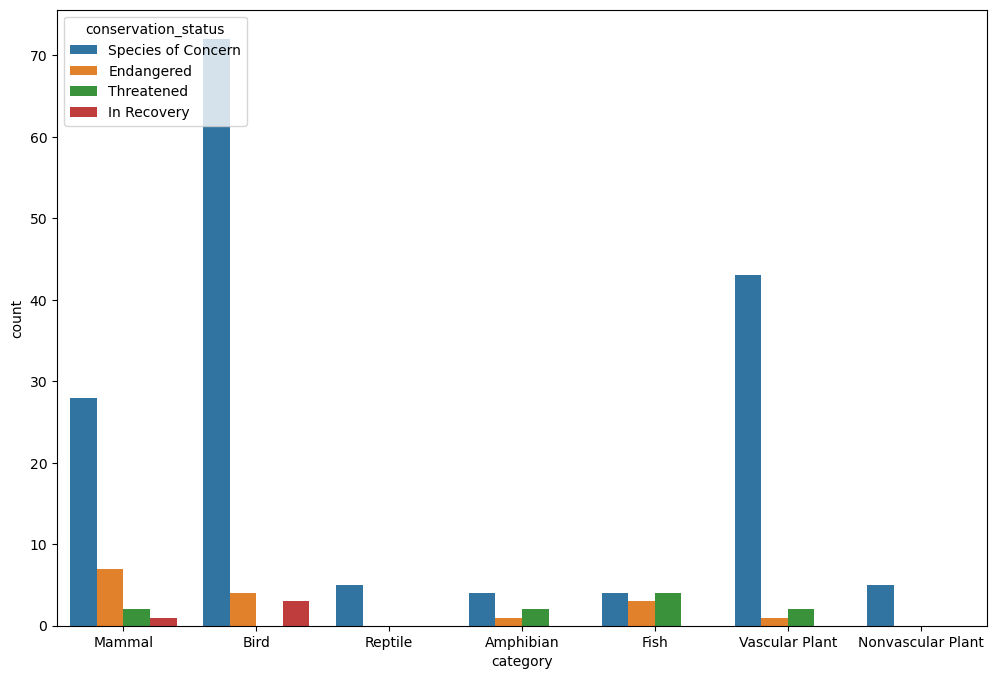

In [36]:
species_info.scientific_name.unique
categories = pd.unique(species_info.category)

species_info.groupby("category").size()

plt.figure(figsize=(12,8))
sns.countplot(data= species_info, x= species_info.category, hue = species_info.conservation_status)
plt.show()

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


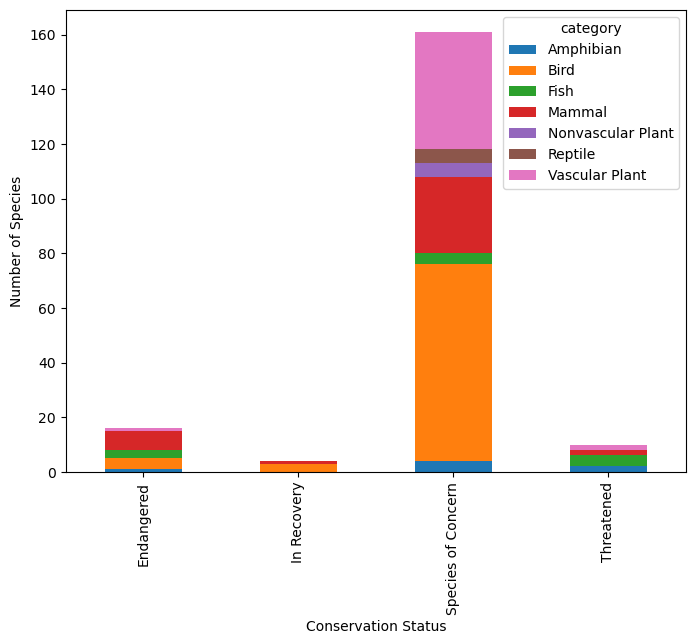

In [45]:
print(f"na values:{species_info.conservation_status.isna().sum()}")

print(species_info.groupby("conservation_status").size())

species_info.fillna('No Intervention', inplace=True)
species_info.groupby("conservation_status").size()

conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");